## 츠키지 참치 가격 - 시계열 🐟
츠키지 수산 시장의 월간 참치 가격

In [3]:
import datetime
import numpy as np
import pandas as pd

In [2]:
#conda install prophet

Channels:
 - conda-forge
 - nvidia
 - pytorch
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /home/leejieun/miniforge3/envs/ai

  added / updated specs:
    - prophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    binutils_impl_linux-64-2.40|       hf600244_0         5.2 MB  conda-forge
    binutils_linux-64-2.40     |       hdade7a5_3          28 KB  conda-forge
    cmdstan-2.33.1             |       hff4ab46_0        46.0 MB  conda-forge
    cmdstanpy-1.2.2            |     pyhd8ed1ab_0          69 KB  conda-forge
    convertdate-2.4.0          |     pyhd8ed1ab_0          38 KB  conda-forge
    ephem-4.1.5                |  py312h98912ed_1         1.3 M

In [5]:
from prophet import Prophet
from prophet.diagnostics import cross_validation

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("/home/leejieun/workspace/kaggle-notebooks/datasets/tcashion/tokyo-wholesale-tuna-prices/tokyo_wholesale_tuna_prices.csv")

In [11]:
df.columns

Index(['year', 'month', 'value', 'species', 'state', 'fleet', 'measure'], dtype='object')

In [16]:
fisheries = df[['species', 'state', 'fleet']].drop_duplicates()
fisheries['id'] = [x for x in range(1, len(fisheries)+1)]
df = df.merge(fisheries)

In [17]:
id_number = 1
measure = 'Price'
temp = df.loc[((df['id'] == id_number) & (df['measure'] == measure))]
temp = temp.reset_index(drop= True)
temp['ds'] = df['year'] + ((df['month'] -1) / 12)
temp = temp.rename(columns={'value': 'y'})
temp['ds'] = [datetime.date(year, month, 1) for year, month in zip(temp['year'], temp['month'])]
prophet_df= temp[['ds', 'y']]

In [18]:
model = Prophet()
model.fit(prophet_df)
df_cv = cross_validation(
    model,
    initial=f'{365 * 5} days',
    period='365 days',
    horizon='365 days'
)

14:36:28 - cmdstanpy - INFO - Chain [1] start processing
14:36:28 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/8 [00:00<?, ?it/s]

14:36:28 - cmdstanpy - INFO - Chain [1] start processing
14:36:28 - cmdstanpy - INFO - Chain [1] done processing
14:36:28 - cmdstanpy - INFO - Chain [1] start processing
14:36:28 - cmdstanpy - INFO - Chain [1] done processing
14:36:28 - cmdstanpy - INFO - Chain [1] start processing
14:36:29 - cmdstanpy - INFO - Chain [1] done processing
14:36:29 - cmdstanpy - INFO - Chain [1] start processing
14:36:29 - cmdstanpy - INFO - Chain [1] done processing
14:36:29 - cmdstanpy - INFO - Chain [1] start processing
14:36:29 - cmdstanpy - INFO - Chain [1] done processing
14:36:29 - cmdstanpy - INFO - Chain [1] start processing
14:36:29 - cmdstanpy - INFO - Chain [1] done processing
14:36:29 - cmdstanpy - INFO - Chain [1] start processing
14:36:29 - cmdstanpy - INFO - Chain [1] done processing
14:36:29 - cmdstanpy - INFO - Chain [1] start processing
14:36:29 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
91,2016-08-01,2901.844066,2443.723285,3366.413346,3234.093635,2015-12-02
92,2016-09-01,3400.659185,2893.720751,3831.352776,3434.789383,2015-12-02
93,2016-10-01,3608.884953,3131.807497,4047.704280,3537.157636,2015-12-02
94,2016-11-01,3883.284209,3426.047598,4357.983967,3889.000000,2015-12-02
95,2016-12-01,4303.002774,3833.310747,4783.150039,3897.530718,2015-12-02


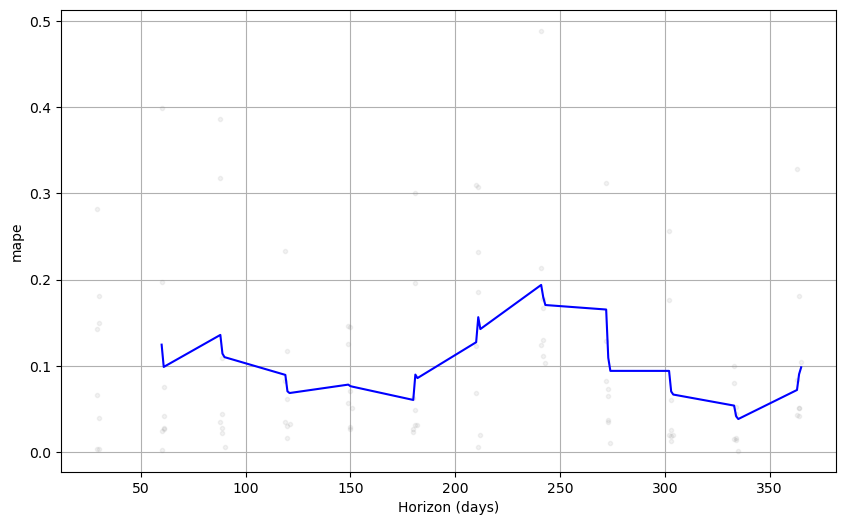

In [20]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [21]:
future_df = model.make_future_dataframe(12, freq='MS')
forecast_df = model.predict(future_df)

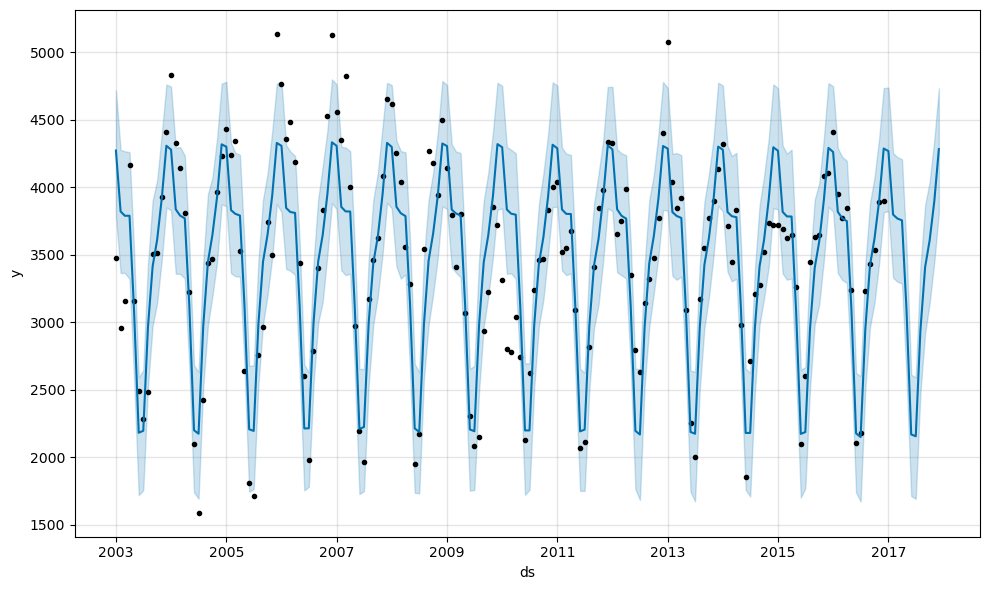

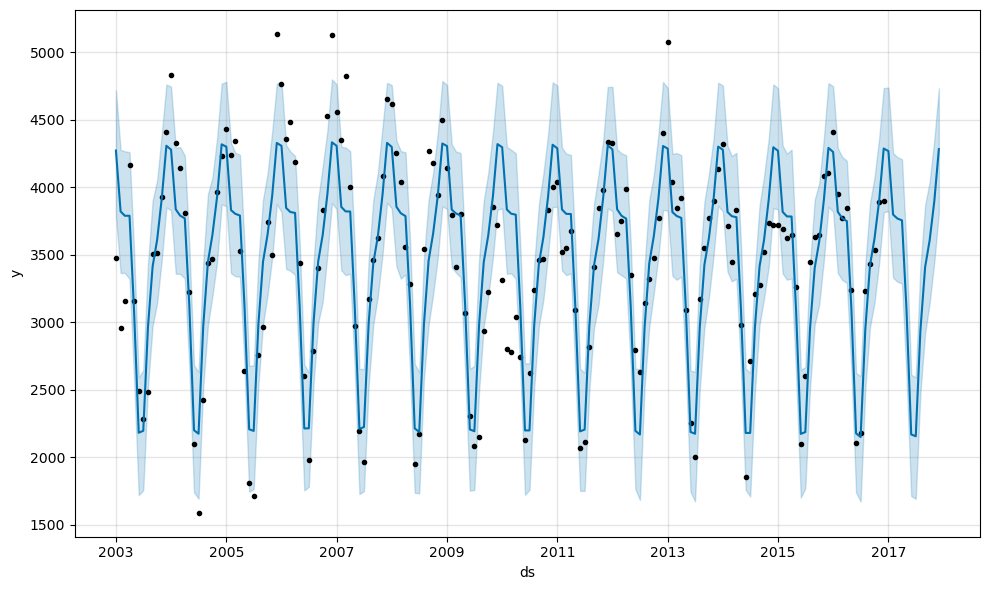

In [22]:
model.plot(forecast_df)